# Hostname Proyect

In [2]:
import random
import pandas as pd
from collections import Counter


hostnames = []
df = None
dataset = []


def set_hostnames(number_of_hosts) -> None:
    sistema_operativo = {"L": 0.40, "S": 0.30, "A": 0.20, "H": 0.10} # variables y pesos de sistema_operativo
    entorno = {"D": 0.10, "T": 0.10, "I": 0.25, "S": 0.25, "P": 0.30} # variables y pesos de entorno
    pais = {"NOR": 0.06, "FRA": 0.09, "ITA": 0.16, "ESP": 0.16, "DEU": 0.23, "IRL": 0.30} # variables y pesos de pais
    hostnames_nonum = []
    for i in range(number_of_hosts):
        sis_rand = random.choices(list(sistema_operativo.keys()), list(sistema_operativo.values()))[0]
        ent_rand = random.choices(list(entorno.keys()), list(entorno.values()))[0]
        pais_ran = random.choices(list(pais.keys()), list(pais.values()))[0]
        hostName = sis_rand + ent_rand + pais_ran
        hostnames_nonum.append(hostName)     
    dict_hostnames = Counter(hostnames_nonum)
    for key, value in dict_hostnames.items():
        for i in range(value):
            hostNameNum = key + '{:0>3}'.format(i + 1)
            hostnames.append(hostNameNum)
            hostnames.sort(reverse=False)
        
            

In [3]:
def get_os(hostname) -> str:
        if hostname.startswith('L'):
            return 'Linux'
        elif hostname.startswith('S'):
            return 'Solaris'
        elif hostname.startswith('A'):
            return 'AIX'
        elif hostname.startswith('H'):
            return 'HP-UX'
        else:
            return 'Unknow'

In [4]:
def get_enviroment(hostname) -> str:
        if hostname[1:2] == 'D':
            return 'Development'
        elif hostname[1:2] == 'I':
            return 'Integration'
        elif hostname[1:2] == 'T':
            return 'Testing'
        elif hostname[1:2] == 'S':
            return 'Staging'
        elif hostname[1:2] == 'P':
            return 'Production'        
        else:
            return 'Unknow'

In [5]:
def get_country(hostname) -> str:
        if hostname[2:5] == 'NOR':
            return 'Norway'
        elif hostname[2:5] == 'DEU':
            return 'Germany'
        elif hostname[2:5] == 'ITA':
            return 'Italy'
        elif hostname[2:5] == 'ESP':
            return 'Spain'
        elif hostname[2:5] == 'IRL':
            return 'Ireland'     
        elif hostname[2:5] == 'FRA':
            return 'France' 
        else:
            return 'Unknow'

In [6]:
def set_dataframe(count) -> None:
    global df
    set_hostnames(count)
    for code_hostname in hostnames:
        dataset.append({
            'hostname': code_hostname,
            'os': get_os(code_hostname),
            'enviroment': get_enviroment(code_hostname),
            'country': get_country(code_hostname),
            'node': int(code_hostname[-3:])
        })
    df = pd.DataFrame(dataset)
    
    

In [7]:
set_dataframe(1500)

In [8]:
df.head()

,hostname,os,enviroment,country,node
0,ADDEU001,AIX,Development,Germany,1
1,ADDEU002,AIX,Development,Germany,2
2,ADDEU003,AIX,Development,Germany,3
3,ADDEU004,AIX,Development,Germany,4
4,ADDEU005,AIX,Development,Germany,5


In [9]:
df.to_csv(
    r'datasets/hosts.csv',
    header = True,
    index = False
)

In [10]:
hosts_df = pd.read_csv(
    r'datasets/hosts.csv',
)

In [11]:
hosts_df.head(25)

,hostname,os,enviroment,country,node
0,ADDEU001,AIX,Development,Germany,1
1,ADDEU002,AIX,Development,Germany,2
2,ADDEU003,AIX,Development,Germany,3
3,ADDEU004,AIX,Development,Germany,4
4,ADDEU005,AIX,Development,Germany,5
5,ADDEU006,AIX,Development,Germany,6
6,ADDEU007,AIX,Development,Germany,7
7,ADDEU008,AIX,Development,Germany,8
8,ADDEU009,AIX,Development,Germany,9
9,ADESP001,AIX,Development,Spain,1


In [12]:
df_coun_env = hosts_df.groupby(['country', 'enviroment']).size()
df_coun_env

country  enviroment 
France   Development     12
         Integration     30
         Production      38
         Staging         40
         Testing         11
Germany  Development     35
         Integration     78
         Production     110
         Staging         96
         Testing         34
Ireland  Development     40
         Integration    117
         Production     139
         Staging        108
         Testing         43
Italy    Development     24
         Integration     78
         Production      77
         Staging         58
         Testing         20
Norway   Development      9
         Integration     19
         Production      32
         Staging         22
         Testing          7
Spain    Development     13
         Integration     66
         Production      73
         Staging         43
         Testing         28
dtype: int64

In [13]:
df_graphs1 = df_coun_env.unstack()
df_graphs1

enviroment,Development,Integration,Production,Staging,Testing
country,,,,,
France,12,30,38,40,11
Germany,35,78,110,96,34
Ireland,40,117,139,108,43
Italy,24,78,77,58,20
Norway,9,19,32,22,7
Spain,13,66,73,43,28


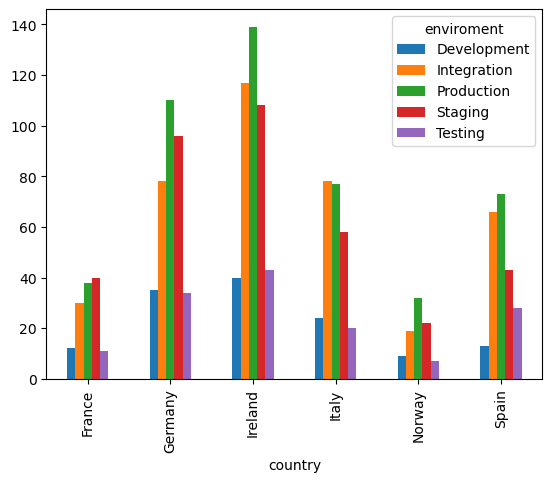

In [14]:
import matplotlib.pyplot as plt
df_graphs1.plot(kind='bar')
plt.show()

In [15]:
df_coun_os = hosts_df.groupby(['country', 'os']).size()
df_graphs2 = df_coun_os.unstack()

In [16]:
df_graphs2

os,AIX,HP-UX,Linux,Solaris
country,,,,
France,26,16,57,32
Germany,67,44,143,99
Ireland,84,35,189,139
Italy,55,26,105,71
Norway,15,4,36,34
Spain,44,24,84,71


<Axes: ylabel='country'>

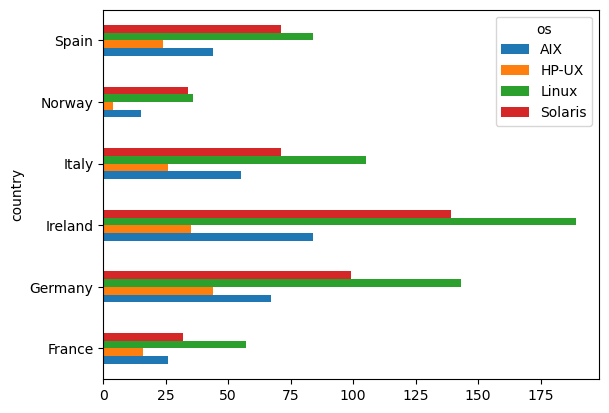

In [17]:
df_graphs2.plot(kind='barh')

In [18]:
df_os = hosts_df.groupby(['os']).size()
print(df_os)
df_graphs3 = df_os
total = df_os.sum()
percent = (df_os/total).round(2)*100
print(percent)
print(percent.index)

os
AIX        291
HP-UX      149
Linux      614
Solaris    446
dtype: int64
os
AIX        19.0
HP-UX      10.0
Linux      41.0
Solaris    30.0
dtype: float64
Index(['AIX', 'HP-UX', 'Linux', 'Solaris'], dtype='object', name='os')


In [19]:
df_graphs4 = hosts_df.groupby(['country']).size().sort_values(ascending=True)
print(df_graphs4)

country
Norway      89
France     131
Spain      223
Italy      257
Germany    353
Ireland    447
dtype: int64


In [27]:
df_count_env = hosts_df.groupby(['country', 'enviroment']).size()
df_graphs5 = df_count_env.unstack(0)
print(df_graphs5)

country      France  Germany  Ireland  Italy  Norway  Spain
enviroment                                                 
Development      12       35       40     24       9     13
Integration      30       78      117     78      19     66
Production       38      110      139     77      32     73
Staging          40       96      108     58      22     43
Testing          11       34       43     20       7     28


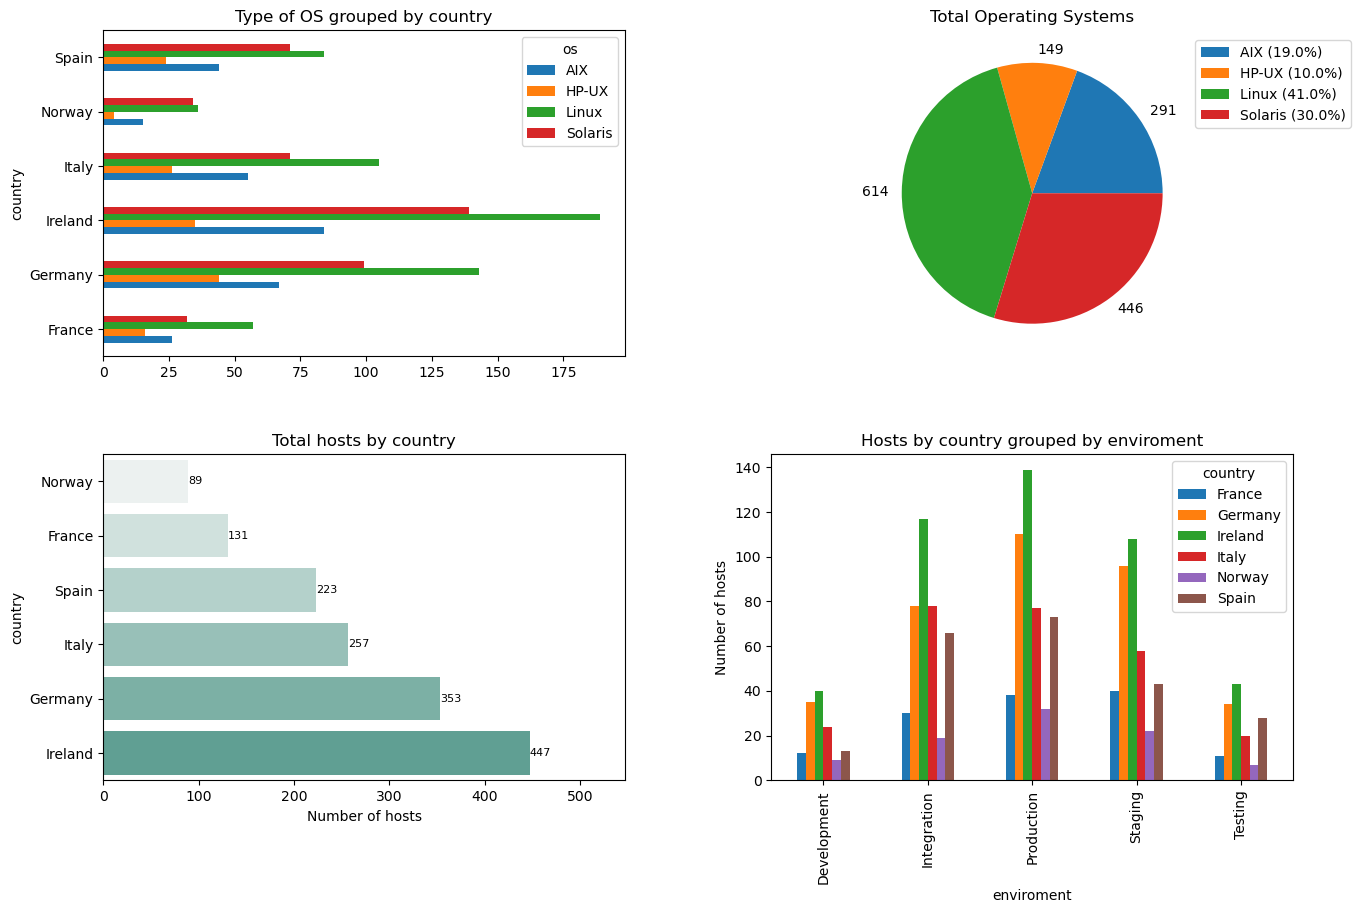

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2) # [0 = fila, 0 = columna]

df_graphs2.plot(
    kind ='barh', 
    ax = ax[0, 0], 
    title = 'Type of OS grouped by country'
)
df_graphs3.plot(
    kind = 'pie', 
    ax = ax[0, 1], 
    title = 'Total Operating Systems', 
    labels = df_os.values
    
)
ax[0, 1].legend(percent.index + ' (' + percent.astype(str) + '%' + ')', loc=(1, 0.7))

df_graphs4.plot(
    kind = 'barh', 
    ax = ax[1, 0],
    title = 'Total hosts by country',
    xlabel = 'Number of hosts',
    ylabel = 'Country'  
)
for i, value in enumerate(df_graphs4.values):
    ax[1, 0].text(value , i , f'{value}', ha='left', va='center', fontsize=8)
    # ax:indicamos el subplot, text: permite colocar texto indicando posicion x,y y el texto que seria f'{value}'
ax[1, 0].set_xlim(0, df_graphs4.values.max() + 100)
sns.barplot(ax=ax[1, 0], x=df_graphs4.values, y=df_graphs4.index, palette='light:#5A9')

df_graphs5.plot(
    kind = 'bar',
    ax = ax[1, 1],
    title = 'Hosts by country grouped by enviroment',
    ylabel = 'Number of hosts'
)
#fig.tight_layout(
   # pad = 0.2,
    #h_pad = 1,
   # w_pad= 0.1
#)
fig.set_figheight(15)
fig.set_figwidth(17)
plt.subplots_adjust(
    left = 0.2,
    bottom= 0.3,
    right=0.9, 
    top=0.8, 
    wspace=0.28, 
    hspace=0.3
)
plt.show()


In [ ]:
# para poder agregar a los nodos el numero que le corresponde se puede usar la siguiente alternativa.
hostName += str(hostnames_nonum.count(hostName)).zfill(3)